# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [84]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [85]:
# Set up Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [86]:
# Visit the website: https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [87]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup object
weather_soup = soup(html, 'html.parser')

In [88]:
# Extract all rows of data
table_data = weather_soup.find('table', class_='table')

# Optional print the table_data to review
print(table_data)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [89]:
# Extract all headers for the columns
table_columns = table_data.find_all('th')

# Create an empty list to store column headers
headers_data = []

# Loop through the scraped data to create a list of headers
for column in table_columns:

    header = column.text

    # Add the header to the list
    headers_data.append(header)

# Print the list to confirm success
print(headers_data)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [90]:
# Extract all rows of data except headers
table_rows = table_data.find_all('tr', class_='data-row')

# Create an empty list to store rows data
rows_data = []

# Loop through the scraped data to create a list of rows
for row in table_rows:

    row = row.find_all('td')

    # Retrieve each column element within each row
    row_element = [element.text.strip() for element in row]

    # Add the row data to the list
    rows_data.append(row_element)

# Print the list to confirm success
rows_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [91]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(rows_data, columns = headers_data)

In [92]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [93]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [94]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df[['id', 'sol', 'ls', 'month']] = weather_df[['id', 'sol', 'ls', 'month']].astype(int)
weather_df[['min_temp', 'pressure']] = weather_df[['min_temp', 'pressure']].astype(float)

In [95]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [96]:
# 1. How many months are there on Mars?
months = len(weather_df['month'].unique())

# Print the result
print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [97]:
# 2. How many Martian days' worth of data are there?
data_duration = weather_df['sol'].count()

# Print the result
print(f"There is {data_duration} Martian days' worth of data in this dataset.")

There is 1867 Martian days' worth of data in this dataset.


In [98]:
# 3. What is the average low temperature by month?
avg_low_temp = weather_df[['month', 'min_temp']].groupby('month').mean()
avg_low_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


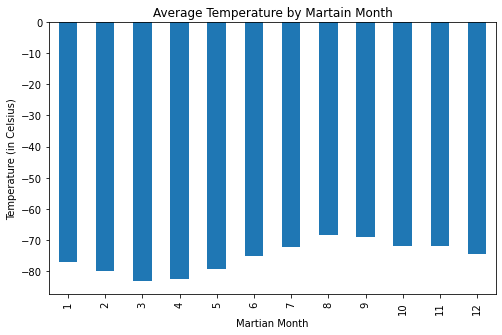

In [99]:
# Plot the average temperature by month
Fig1 = avg_low_temp.plot(kind='bar', figsize=(8,5), legend=False)

# Set axis labels and chart title
plt.xlabel("Martian Month")
plt.ylabel("Temperature (in Celsius)")
plt.title("Average Temperature by Martain Month")

# Save the chart image
plt.savefig('Output/Fig1.png')

# Show the chart
plt.show()

In [100]:
# Identify the coldest and hottest months in Curiosity's location

# Identify the coldest month and its temperature
coldest_temp = avg_low_temp['min_temp'].min()
coldest_month = avg_low_temp[avg_low_temp['min_temp'] == coldest_temp].index[0]

# Identify the hottest month and its temperature
hottest_temp = avg_low_temp['min_temp'].max()
hottest_month = avg_low_temp[avg_low_temp['min_temp'] == hottest_temp].index[0]

# Print the coldest and hottest months and the respective temperatures
print(f"Month {coldest_month} is the coldest month on Mars with an average temperature of {round((coldest_temp),2)} Celsius.")
print(f"Month {hottest_month} is the hottest month on Mars with an average temperature of {round((hottest_temp),2)} Celsius.")

Month 3 is the coldest month on Mars with an average temperature of -83.31 Celsius.
Month 8 is the hottest month on Mars with an average temperature of -68.38 Celsius.


In [102]:
# 4. Average pressure by Martian month
avg_pressure = weather_df[['month', 'pressure']].groupby('month').mean()
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


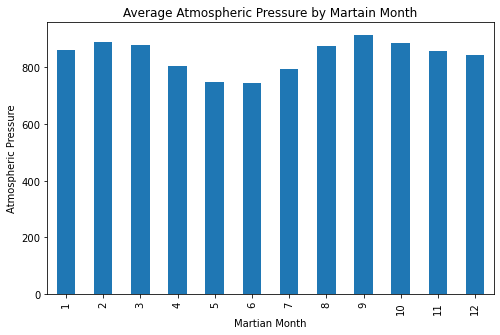

In [103]:
# Plot the average pressure by month
Fig2 = avg_pressure.plot(kind='bar', figsize=(8,5), legend=False)

# Set axis labels and chart title
plt.xlabel("Martian Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Atmospheric Pressure by Martain Month")

# Save the chart image
plt.savefig('Output/Fig2.png')

# Show the chart
plt.show()

In [104]:
# Identify the months with the lowest and the highest atmospheric pressure on Mars

# Identify the month with the lowest pressure
lowest_pressure = avg_pressure['pressure'].min()
lowest_pressure_month = avg_pressure[avg_pressure['pressure'] == lowest_pressure].index[0]

# Identify the month with the highest pressure
highest_pressure = avg_pressure['pressure'].max()
highest_pressure_month = avg_pressure[avg_pressure['pressure'] == highest_pressure].index[0]

# Print the coldest and hottest months and the respective temperatures
print(f"Month {lowest_pressure_month} has the lowest atmospheric pressure on Mars which is {round((lowest_pressure),2)}.")
print(f"Month {highest_pressure_month} has the highest atmospheric pressure on Mars which is {round((highest_pressure),2)}.")

Month 6 has the lowest atmospheric pressure on Mars which is 745.05.
Month 9 has the highest atmospheric pressure on Mars which is 913.31.


In [83]:
# 5. How many terrestrial (earth) days are there in a Martian year?
total_earth_days = (weather_df['terrestrial_date'].max()-weather_df['terrestrial_date'].min()).days
print(total_earth_days)

total_martian_days = weather_df['sol'].max()-weather_df['sol'].min()+1
print(total_martian_days)

difference = total_martian_days-total_earth_days
print(difference)


2021
1968
-53


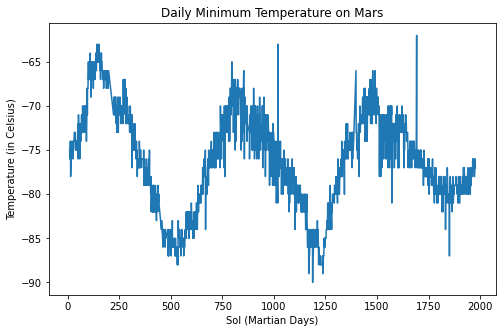

In [114]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature on Mars
Fig3 = weather_df.plot(x='sol', y='min_temp', figsize=(8,5), legend=False)

# Set axis labels and chart title
plt.xlabel("Sol (Martian Days)")
plt.ylabel("Temperature (in Celsius)")
plt.title("Daily Minimum Temperature on Mars")

# Save the chart image
# plt.savefig('Output/Fig3.png')

# Show the chart
plt.show()

In [115]:
from scipy.signal import find_peaks

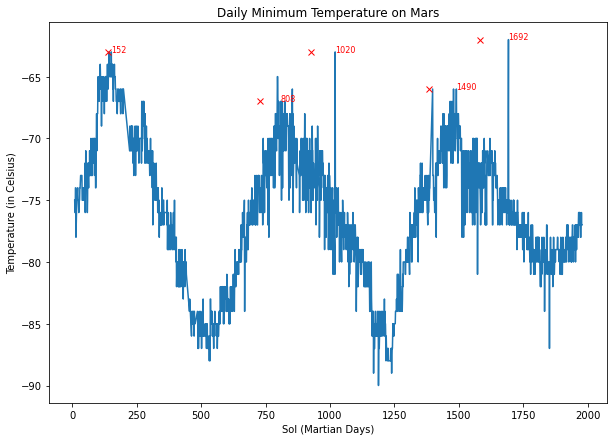

In [195]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x = weather_df['sol']
y = weather_df['min_temp']

peaks, _ = find_peaks(y, height=-67, threshold=2, distance=150)
    
# Visually estimate the result by plotting the daily minimum temperature on Mars
Fig4, ax = plt.subplots(figsize=(10,7))
plt.plot(x, y)
plt.plot(peaks, y[peaks], "x", color='r')

for i, j in zip(x[peaks],y[peaks]):
    ax.annotate(i, xy=(i,j), size=8, color='r')

# Set axis labels and chart title
plt.xlabel("Sol (Martian Days)")
plt.ylabel("Temperature (in Celsius)")
plt.title("Daily Minimum Temperature on Mars")

# Save the chart image
# plt.savefig('Output/Fig3.png')

# Show the chart
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV


In [80]:
browser.quit()